In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
%matplotlib inline

In [2]:
df = pd.read_csv('C:/Users/PC/Desktop/Python/Datasets/TSLA.csv')
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,2010-06-29,19.000000,25.000000,17.540001,23.889999,23.889999,18766300
1,2010-06-30,25.790001,30.420000,23.299999,23.830000,23.830000,17187100
2,2010-07-01,25.000000,25.920000,20.270000,21.959999,21.959999,8218800
3,2010-07-02,23.000000,23.100000,18.709999,19.200001,19.200001,5139800
4,2010-07-06,20.000000,20.000000,15.830000,16.110001,16.110001,6866900
...,...,...,...,...,...,...,...
2411,2020-01-28,568.489990,576.809998,558.080017,566.900024,566.900024,11788500
2412,2020-01-29,575.690002,589.799988,567.429993,580.989990,580.989990,17801500
2413,2020-01-30,632.419983,650.880005,618.000000,640.809998,640.809998,29005700
2414,2020-01-31,640.000000,653.000000,632.520020,650.570007,650.570007,15719300


In [5]:
import math
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM


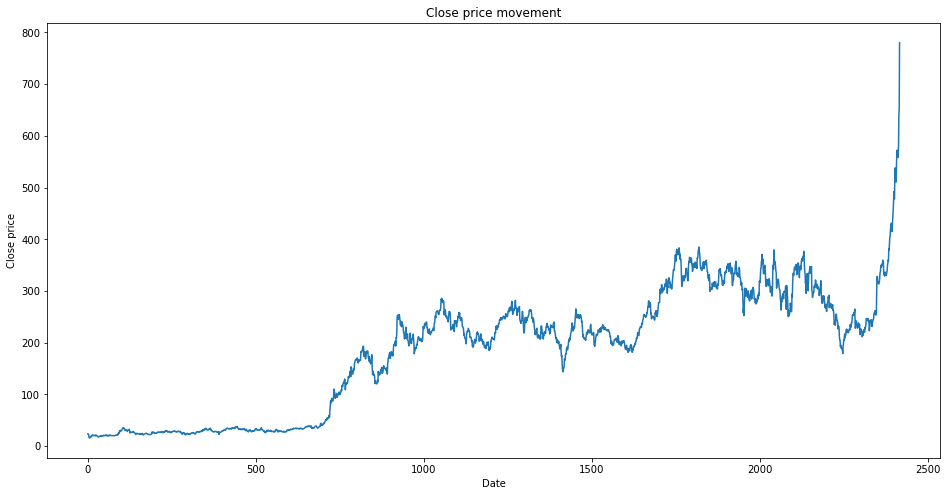

In [7]:
plt.figure(figsize = (16,8))
plt.title('Close price movement')
plt.plot(df['Close'])
plt.xlabel('Date')
plt.ylabel('Close price')
plt.show()

In [10]:
data = df.filter(['Close'])
dataset = data.values
len(dataset)

2416

In [14]:
train_size = math.ceil(len(dataset)*.7)
train_size

1692

In [16]:
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)
scaled_data

array([[0.01058623],
       [0.01050772],
       [0.00806072],
       ...,
       [0.81786181],
       [0.83063335],
       [1.        ]])

In [18]:
train_data  = scaled_data[0:train_size, :]
x_train = []
y_train = []
for i in range(60,len(train_data)):
    x_train.append(train_data[i-60:i,0])
    y_train.append(train_data[i,0])
    if i<=61:
        print(x_train)
        print(y_train)
    

[array([0.01058623, 0.01050772, 0.00806072, 0.0044491 , 0.00040565,
       0.        , 0.0021722 , 0.00209369, 0.0016357 , 0.00306202,
       0.00528657, 0.005352  , 0.00633342, 0.00799529, 0.00588851,
       0.00578382, 0.0068045 , 0.00718398, 0.00673907, 0.00621565,
       0.0064381 , 0.00595394, 0.00541743, 0.00669982, 0.00804763,
       0.00714473, 0.0060848 , 0.00495943, 0.00497252, 0.00422664,
       0.00274797, 0.0023554 , 0.00329757, 0.0038995 , 0.00438367,
       0.00388642, 0.00391259, 0.00431824, 0.00566605, 0.0044491 ,
       0.00536509, 0.0051688 , 0.00510338, 0.00532583, 0.00481549,
       0.0060848 , 0.00688301, 0.00686993, 0.00620257, 0.00667365,
       0.00642502, 0.0057184 , 0.0064381 , 0.00696153, 0.00808689,
       0.00672599, 0.00579691, 0.00688301, 0.00650353, 0.00532583])]
[0.004920176655325834]
[array([0.01058623, 0.01050772, 0.00806072, 0.0044491 , 0.00040565,
       0.        , 0.0021722 , 0.00209369, 0.0016357 , 0.00306202,
       0.00528657, 0.005352  , 0.00

In [20]:
x_train , Y_train = np.array(x_train), np.array(y_train)
x_train = np.reshape(x_train,(x_train.shape[0],x_train.shape[1],1))
x_train.shape

(1632, 60, 1)

In [23]:
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape = (x_train.shape[1],1)))
model.add(LSTM(50,return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

In [24]:
model.compile(optimizer='adam',loss="mean_squared_error")

In [27]:
model.fit(x_train,Y_train,batch_size=1,epochs=10)

Epoch 1/10
1632/1632 [==============================] - 42s 16ms/step - loss: 0.0013
Epoch 2/10
1632/1632 [==============================] - 29s 18ms/step - loss: 2.2358e-04
Epoch 3/10
1632/1632 [==============================] - 27s 16ms/step - loss: 1.4468e-04
Epoch 4/10
1632/1632 [==============================] - 29s 18ms/step - loss: 1.1894e-04
Epoch 5/10
1632/1632 [==============================] - 30s 18ms/step - loss: 8.4754e-05
Epoch 6/10
1632/1632 [==============================] - 47s 29ms/step - loss: 8.3186e-05
Epoch 7/10
1632/1632 [==============================] - 28s 17ms/step - loss: 8.3792e-05
Epoch 8/10
1632/1632 [==============================] - 27s 16ms/step - loss: 8.7003e-05
Epoch 9/10
1632/1632 [==============================] - 37s 23ms/step - loss: 8.2481e-05
Epoch 10/10
1632/1632 [==============================] - 27s 17ms/step - loss: 8.4329e-05


In [29]:
test_data = scaled_data[train_size-60:,:]
x_test = []
y_test = dataset[train_size:,:]
for i in range(60,len(test_data)):
    x_test.append(test_data[i-60:i,0])

In [30]:
x_test = np.array(x_test)

In [31]:
x_test = np.reshape(x_test,(x_test.shape[0],x_test.shape[1],1))

In [32]:
prediction = model.predict(x_test)
prediction = scaler.inverse_transform(prediction)

In [33]:
rmse = np.sqrt(np.mean(prediction-y_test)**2)
rmse

1.3117961370397757

<ipython-input-36-042a88610ca2>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = prediction


<function matplotlib.pyplot.show(*args, **kw)>

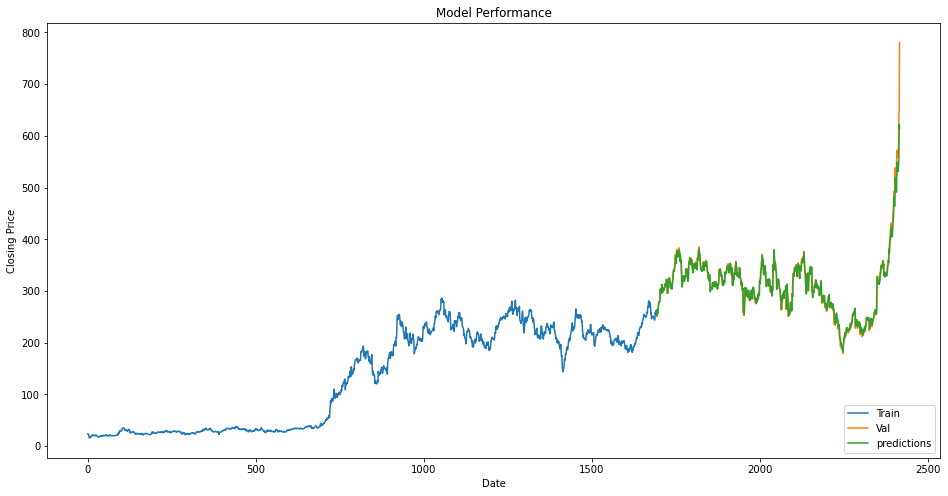

In [36]:
train = df[:train_size]
valid = df[train_size:]
valid['Predictions'] = prediction
plt.figure(figsize=(16,8))
plt.title("Model Performance")
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.plot(train['Close'])
plt.plot(valid[['Close','Predictions']])
plt.legend(['Train','Val','predictions'],loc = 'lower right')
plt.show